## Importing necessary libraries

In [1]:
import pandas as pd

## Loading dataset

In [2]:
df=pd.read_excel('songs.xlsx')

## Checking for null values in the dataset

In [3]:
df.isnull().sum()

Unnamed: 0       0
video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

## Imputing values in null rows

In [4]:
df['description'].fillna('No description', inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0       0
video_id         0
channelTitle     0
title            0
description      0
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19345 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  object
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 1.9+ MB


In [7]:
df.columns

Index(['Unnamed: 0', 'video_id', 'channelTitle', 'title', 'description',
       'tags', 'publishedAt', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'duration', 'definition', 'caption'],
      dtype='object')

## Headers(Columns) Preprocessing

In [8]:
#Renaming columns
df.rename(columns={'Unnamed: 0': 'S.No'}, inplace=True)

In [9]:
#striping the whitespace
df.columns=[i.lower().strip() for i in df.columns]

In [10]:
df.columns

Index(['s.no', 'video_id', 'channeltitle', 'title', 'description', 'tags',
       'publishedat', 'viewcount', 'likecount', 'favoritecount',
       'commentcount', 'duration', 'definition', 'caption'],
      dtype='object')

## Preprocessing video_id column

In [11]:
# Verify data type of 'video_id'
print(df['video_id'].dtype)

# Check for duplicates in 'video_id'
duplicates = df['video_id'].duplicated().sum()
print(f"Number of duplicate video_ids: {duplicates}")

# Check for unique video IDs in 'video_id'
unique_video_ids = df['video_id'].nunique()
print(f"Number of unique video IDs: {unique_video_ids}")

# Check for missing values in 'video_id'
missing_values = df['video_id'].isnull().sum()
print(f"Number of missing video_ids: {missing_values}")

# Ensure consistent formatting (strip any leading/trailing whitespace)
df['video_id'] = df['video_id'].str.strip()

# Summary of 'video_id' column after preprocessing
print(df['video_id'].describe())

object
Number of duplicate video_ids: 0
Number of unique video IDs: 19345
Number of missing video_ids: 0
count           19345
unique          19345
top       F44TK5EHCRo
freq                1
Name: video_id, dtype: object


## Preprocessing channeltitle column

In [12]:
df['channeltitle']

0        T-Series
1        T-Series
2        T-Series
3        T-Series
4        T-Series
           ...   
19340    T-Series
19341    T-Series
19342    T-Series
19343    T-Series
19344    T-Series
Name: channeltitle, Length: 19345, dtype: object

In [13]:
# Verify uniqueness
unique_channels = df['channeltitle'].unique()
print(f"Unique channel titles: {unique_channels}")

Unique channel titles: ['T-Series']


## Preprocessing title column

In [14]:
df['title']

0        RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...
1        TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...
2        ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...
3        HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...
4        Har Har Mahadev (Lyrical Video): Sachet Tandon...
                               ...                        
19340    ROLA PE GAYA  FULL SONG| PATIALA HOUSE | AKSHA...
19341                    Patiala House-Official Trailer II
19342    Kyun Mein Jagoon Song (Patiala House ) | Aksha...
19343    Laung Da Lashkara (Patiala House) Full Song | ...
19344    "Patiala House" Official Trailer 2 | Akshay Kumar
Name: title, Length: 19345, dtype: object

In [15]:
# Check for missing values
missing_titles = df['title'].isnull().sum()
print(f"Number of missing titles: {missing_titles}")

# Text normalization
df['title'] = df['title'].str.lower().str.strip()

# Remove special characters
df['title'] = df['title'].str.replace('[^\w\s]', '', regex=True)

# Verify the changes
print(df['title'])

Number of missing titles: 0
0        rafta rafta lofi mix  dj moody  kk  jeet ganng...
1        tum ho mera pyar lofi mix  dj moody  kk suzzan...
2        ishq hothon se lofi mix audio  dj moody  kk sh...
3        humko pyar hua lofi mix audio  dj moody  kk tu...
4        har har mahadev lyrical video sachet tandon pa...
                               ...                        
19340    rola pe gaya  full song patiala house  akshay ...
19341                     patiala houseofficial trailer ii
19342    kyun mein jagoon song patiala house   akshay k...
19343    laung da lashkara patiala house full song  fea...
19344       patiala house official trailer 2  akshay kumar
Name: title, Length: 19345, dtype: object


In [16]:
df['title'][0]

'rafta rafta lofi mix  dj moody  kk  jeet gannguli  soulful kk lofi mix'

## Preprocessing description column

In [17]:
df['description']

0        Presenting the song "RAFTA RAFTA (Lo-Fi Mix)" ...
1        Presenting the song "TUM HO MERA PYAR (Lo-Fi M...
2        Presenting the song "ISHQ HOTHON SE (Lo-Fi Mix...
3        Presenting the song "HUMKO PYAR HUA (Lo-Fi Mix...
4        T-Series Presents "Har Har Mahadev (Lyrical Vi...
                               ...                        
19340    Watch the song "Rola Pe Gaya" from the movie '...
19341        Patiala house upcoming movie official trailer
19342    "Here's presenting the song ""Kyun Main Jagoon...
19343    Watch the full video song "Laung Da Lashkara" ...
19344    Here's presenting the official trailer from th...
Name: description, Length: 19345, dtype: object

In [18]:
# Check for missing values
missing_descriptions = df['description'].isnull().sum()
print(f"Number of missing descriptions: {missing_descriptions}")

# Fill missing descriptions with a placeholder (if any)
df['description'].fillna('No description available', inplace=True)

# Text normalization
df['description'] = df['description'].str.lower().str.strip()

# Remove special characters
df['description'] = df['description'].str.replace('[^\w\s]', '', regex=True)

print(df['description'])

Number of missing descriptions: 0
0        presenting the song rafta rafta lofi mix by dj...
1        presenting the song tum ho mera pyar lofi mix ...
2        presenting the song ishq hothon se lofi mix by...
3        presenting the song humko pyar hua lofi mix by...
4        tseries presents har har mahadev lyrical video...
                               ...                        
19340    watch the song rola pe gaya from the movie pat...
19341        patiala house upcoming movie official trailer
19342    heres presenting the song kyun main jagoon fro...
19343    watch the full video song laung da lashkara of...
19344    heres presenting the official trailer from the...
Name: description, Length: 19345, dtype: object


In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

# Apply preprocessing to the 'description' column
df['processed_description'] = df['description'].apply(preprocess_text)

# Show the first few rows of the dataframe
print(df[['description', 'processed_description']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         description  \
0  Presenting the song "RAFTA RAFTA (Lo-Fi Mix)" ...   
1  Presenting the song "TUM HO MERA PYAR (Lo-Fi M...   
2  Presenting the song "ISHQ HOTHON SE (Lo-Fi Mix...   
3  Presenting the song "HUMKO PYAR HUA (Lo-Fi Mix...   
4  T-Series Presents "Har Har Mahadev (Lyrical Vi...   

                               processed_description  
0  presenting song rafta rafta lofi mix dj moody ...  
1  presenting song tum ho mera pyar lofi mix dj m...  
2  presenting song ishq hothon se lofi mix dj moo...  
3  presenting song humko pyar hua lofi mix dj moo...  
4  tseries present har har mahadev lyrical video ...  


In [58]:
def preprocess_description(processed_description):
    # Remove URLs
    description = re.sub(r'http\S+', '', processed_description)
    
    # Remove non-alphanumeric characters and extra spaces
    description = re.sub(r'[^\w\s]', ' ', processed_description)
    description = re.sub(r'\s+', ' ', processed_description).strip()
    
    # Convert to lowercase
    processed_description = processed_description.lower()
    
    # Split by horizontal line separator and keep only the first part
    parts = processed_description.split('___________________________________')
    cleaned_description = parts[0].strip() if parts else processed_description
    
    return cleaned_description

# Apply the preprocessing function to the 'description' column
df['description_cleaned'] = df['processed_description'].apply(preprocess_description)

# Verify the changes
print(df[['processed_description', 'description_cleaned']].head())

                               processed_description  \
0  presenting song rafta rafta lofi mix dj moody ...   
1  presenting song tum ho mera pyar lofi mix dj m...   
2  presenting song ishq hothon se lofi mix dj moo...   
3  presenting song humko pyar hua lofi mix dj moo...   
4  tseries present har har mahadev lyrical video ...   

                                 description_cleaned  
0  presenting song rafta rafta lofi mix dj moody ...  
1  presenting song tum ho mera pyar lofi mix dj m...  
2  presenting song ishq hothon se lofi mix dj moo...  
3  presenting song humko pyar hua lofi mix dj moo...  
4  tseries present har har mahadev lyrical video ...  


## Preprocessing tags column

In [20]:
df['tags']

0        ['hindi songs 2023', 'hindi songs new', 'bolly...
1        ['hindi songs 2023', 'hindi songs new', 'bolly...
2        ['hindi songs 2023', 'hindi songs new', 'bolly...
3        ['hindi songs 2023', 'hindi songs new', 'bolly...
4        ['hindi songs 2023', 'hindi songs new', 'bolly...
                               ...                        
19340    ['Rola Pe Gaya', 'Anushka Sharma', 'Patiala Ho...
19341    ['new songs', 'official trailer', 'Songs', 'Di...
19342    ['film songs', 'songs', 'bollywood song', 'anu...
19343    ['laungda lashkara', 'laung da lashkara', 'aks...
19344    ['Patiala House movie film', 'Patiaala House T...
Name: tags, Length: 19345, dtype: object

In [21]:
# Check for missing values
missing_tags = df['tags'].isnull().sum()
print(f"Number of missing tags: {missing_tags}")

# Convert lists of tags to a single string
df['tags'] = df['tags'].apply(lambda x: ', '.join(eval(x)))

# Text normalization
df['tags'] = df['tags'].str.lower().str.strip()

# Verify the changes
print(df['tags'].head())

Number of missing tags: 0
0    hindi songs 2023, hindi songs new, bollywood s...
1    hindi songs 2023, hindi songs new, bollywood s...
2    hindi songs 2023, hindi songs new, bollywood s...
3    hindi songs 2023, hindi songs new, bollywood s...
4    hindi songs 2023, hindi songs new, bollywood s...
Name: tags, dtype: object


In [22]:
df['tags'][0]

'hindi songs 2023, hindi songs new, bollywood songs 2023, bollywood movies 2023, tseries, tseries songs, hindi songs, bollywood romantic songs, romantic hindi songs, hindi songs bollywood, remix hindi songs, hindi song status, kk, salman khan, dj moody, kk songs lofi, lofi love songs, lofi songs hindi, kk mashup, kk all hit song, rafta rafta, rafta rafta kk, jeet ganguly, lofi song'

## Preprocessing Publisheddat column

In [23]:
df['publishedat']

0        2023-08-20T12:30:08Z
1        2023-08-20T10:30:01Z
2        2023-08-20T09:30:00Z
3        2023-08-20T07:30:05Z
4        2023-08-20T05:30:06Z
                 ...         
19340    2011-01-20T13:34:53Z
19341    2011-01-13T11:27:42Z
19342    2011-01-07T09:36:16Z
19343    2011-01-03T07:10:25Z
19344    2010-12-23T10:29:50Z
Name: publishedat, Length: 19345, dtype: object

In [24]:
# Convert to datetime
df['publishedat'] = pd.to_datetime(df['publishedat'])

# Extract date parts
df['year'] = df['publishedat'].dt.year
df['month'] = df['publishedat'].dt.month
df['day'] = df['publishedat'].dt.day
df['hour'] = df['publishedat'].dt.hour

In [25]:
print(df[['publishedat', 'year', 'month', 'day', 'hour']].head())

                publishedat  year  month  day  hour
0 2023-08-20 12:30:08+00:00  2023      8   20    12
1 2023-08-20 10:30:01+00:00  2023      8   20    10
2 2023-08-20 09:30:00+00:00  2023      8   20     9
3 2023-08-20 07:30:05+00:00  2023      8   20     7
4 2023-08-20 05:30:06+00:00  2023      8   20     5


In [26]:
df.columns

Index(['s.no', 'video_id', 'channeltitle', 'title', 'description', 'tags',
       'publishedat', 'viewcount', 'likecount', 'favoritecount',
       'commentcount', 'duration', 'definition', 'caption',
       'processed_description', 'year', 'month', 'day', 'hour'],
      dtype='object')

## Preprocessing viewcount column

In [27]:
df['viewcount']

0            7299
1            4212
2            2849
3            3991
4          101950
           ...   
19340      636734
19341       86841
19342      364995
19343    13663672
19344     1662209
Name: viewcount, Length: 19345, dtype: int64

In [28]:
# Check for missing values in 'viewcount'
missing_viewcount = df['viewcount'].isnull().sum()
print(f"Missing values in 'viewcount': {missing_viewcount}")

Missing values in 'viewcount': 0


In [29]:
# Calculate the IQR for 'viewcount'
Q1 = df['viewcount'].quantile(0.25)
Q3 = df['viewcount'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df = df[(df['viewcount'] >= lower_bound) & (df['viewcount'] <= upper_bound)]

# Set display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Verify the changes
print(df['viewcount'].describe())

count     15954.00
mean     766146.23
std     1255451.02
min           0.00
25%       57530.50
50%      222082.50
75%      807482.00
max     6409185.00
Name: viewcount, dtype: float64


## Preprocessing likecount column

In [30]:
df['likecount']

0          241
1          144
2           79
3          116
4         6230
         ...  
19339     1859
19340      943
19341     1084
19342     1865
19344    29257
Name: likecount, Length: 15954, dtype: int64

In [31]:
# Set display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Calculate the IQR for 'likecount'
Q1 = df['likecount'].quantile(0.25)
Q3 = df['likecount'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df = df[(df['likecount'] >= lower_bound) & (df['likecount'] <= upper_bound)]

# Verify the changes
print(df['likecount'].describe())

count   14052.00
mean     3760.11
std      4885.47
min         0.00
25%       363.75
50%      1495.50
75%      5394.25
max     21260.00
Name: likecount, dtype: float64


## Preprocessing favoritecount column

In [32]:
df['favoritecount']

0        0
1        0
2        0
3        0
4        0
        ..
19338    0
19339    0
19340    0
19341    0
19342    0
Name: favoritecount, Length: 14052, dtype: int64

In [33]:
# Since 'favoritecount' contains only zeros, no further processing is needed
print("Summary statistics for 'favoritecount':")
print(df['favoritecount'].describe())

Summary statistics for 'favoritecount':
count   14052.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: favoritecount, dtype: float64


## Preprocessing commentcount column

In [34]:
df['commentcount']

0         59
1         32
2         31
3         36
4        434
        ... 
19338     31
19339     38
19340     18
19341      4
19342     30
Name: commentcount, Length: 14052, dtype: int64

In [35]:
# Calculate the IQR for 'commentcount'
Q1_commentcount = df['commentcount'].quantile(0.25)
Q3_commentcount = df['commentcount'].quantile(0.75)
IQR_commentcount = Q3_commentcount - Q1_commentcount

# Determine the lower and upper bounds for 'commentcount'
lower_bound_commentcount = Q1_commentcount - 1.5 * IQR_commentcount
upper_bound_commentcount = Q3_commentcount + 1.5 * IQR_commentcount

# Filter the dataframe to remove outliers in 'commentcount'
df = df[(df['commentcount'] >= lower_bound_commentcount) & (df['commentcount'] <= upper_bound_commentcount)]

# Verify the changes
print("Summary statistics for 'commentcount':")
print(df['commentcount'].describe())

Summary statistics for 'commentcount':
count   12787.00
mean      125.79
std       145.72
min         0.00
25%        19.00
50%        62.00
75%       183.50
max       609.00
Name: commentcount, dtype: float64


## Preprocessing duration column

In [36]:
df['duration']

0        PT4M42S
1        PT5M27S
2        PT6M10S
3        PT5M59S
4        PT3M37S
          ...   
19338    PT1M34S
19339    PT1M19S
19340    PT1M31S
19341    PT3M32S
19342    PT1M46S
Name: duration, Length: 12787, dtype: object

In [37]:
import re

# Function to convert ISO 8601 duration to total seconds
def parse_duration(duration):
    if duration == 'P0D':
        return 0
    match = re.match(r'PT(\d+H)?(\d+M)?(\d+S)?', duration)
    if match:
        hours = int(match.group(1)[:-1]) if match.group(1) else 0
        minutes = int(match.group(2)[:-1]) if match.group(2) else 0
        seconds = int(match.group(3)[:-1]) if match.group(3) else 0
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        print(f"Could not parse duration: {duration}")
        return None

# Apply the function to the 'duration' column and assign directly to the DataFrame
df['duration_seconds'] = df['duration'].apply(parse_duration)

# Verify the changes
print(df[['duration', 'duration_seconds']])

      duration  duration_seconds
0      PT4M42S               282
1      PT5M27S               327
2      PT6M10S               370
3      PT5M59S               359
4      PT3M37S               217
...        ...               ...
19338  PT1M34S                94
19339  PT1M19S                79
19340  PT1M31S                91
19341  PT3M32S               212
19342  PT1M46S               106

[12787 rows x 2 columns]


## Preprocessing definition column

In [38]:
df['definition']

0        hd
1        hd
2        hd
3        hd
4        hd
         ..
19338    hd
19339    sd
19340    hd
19341    sd
19342    sd
Name: definition, Length: 12787, dtype: object

In [39]:
print(df['definition'].isnull().sum())
df['definition'] = df['definition'].str.lower()

0


## Preprocessing caption column

In [40]:
df['caption']

0        False
1        False
2        False
3        False
4        False
         ...  
19338    False
19339    False
19340    False
19341    False
19342    False
Name: caption, Length: 12787, dtype: bool

In [41]:
print(df['caption'].isnull().sum())
# Convert any non-boolean values to boolean if needed
df['caption'] = df['caption'].astype(bool)

0


In [42]:
df.head()

,s.no,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,favoritecount,commentcount,duration,definition,caption,processed_description,year,month,day,hour,duration_seconds
0,0,F44TK5EHCRo,T-Series,rafta rafta lofi mix dj moody kk jeet ganng...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 12:30:08+00:00,7299,241,0,59,PT4M42S,hd,False,presenting song rafta rafta lofi mix dj moody ...,2023,8,20,12,282
1,1,adx8Rsjp-c0,T-Series,tum ho mera pyar lofi mix dj moody kk suzzan...,"Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 10:30:01+00:00,4212,144,0,32,PT5M27S,hd,False,presenting song tum ho mera pyar lofi mix dj m...,2023,8,20,10,327
2,2,36nQLyrR7Sw,T-Series,ishq hothon se lofi mix audio dj moody kk sh...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 09:30:00+00:00,2849,79,0,31,PT6M10S,hd,False,presenting song ishq hothon se lofi mix dj moo...,2023,8,20,9,370
3,3,TKbifi5AMQo,T-Series,humko pyar hua lofi mix audio dj moody kk tu...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 07:30:05+00:00,3991,116,0,36,PT5M59S,hd,False,presenting song humko pyar hua lofi mix dj moo...,2023,8,20,7,359
4,4,NNA21SoGqss,T-Series,har har mahadev lyrical video sachet tandon pa...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 05:30:06+00:00,101950,6230,0,434,PT3M37S,hd,False,tseries present har har mahadev lyrical video ...,2023,8,20,5,217


## #Exporting preprocessed dataframe into excel

In [49]:
# Assuming df['publishedat'] and any other datetime columns are in UTC
# Convert datetime columns to timezone-unaware datetime objects
df['publishedat'] = df['publishedat'].dt.tz_convert(None)

TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize

In [50]:
df['publishedat'] = df['publishedat'].dt.strftime('%Y-%m-%d %H:%M:%S')
df.to_excel('songs_preprocessed.xlsx', index=False)

In [51]:
df.head()

,s.no,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,favoritecount,commentcount,duration,definition,caption,processed_description,year,month,day,hour,duration_seconds
0,0,F44TK5EHCRo,T-Series,rafta rafta lofi mix dj moody kk jeet ganng...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 12:30:08,7299,241,0,59,PT4M42S,hd,False,presenting song rafta rafta lofi mix dj moody ...,2023,8,20,12,282
1,1,adx8Rsjp-c0,T-Series,tum ho mera pyar lofi mix dj moody kk suzzan...,"Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 10:30:01,4212,144,0,32,PT5M27S,hd,False,presenting song tum ho mera pyar lofi mix dj m...,2023,8,20,10,327
2,2,36nQLyrR7Sw,T-Series,ishq hothon se lofi mix audio dj moody kk sh...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 09:30:00,2849,79,0,31,PT6M10S,hd,False,presenting song ishq hothon se lofi mix dj moo...,2023,8,20,9,370
3,3,TKbifi5AMQo,T-Series,humko pyar hua lofi mix audio dj moody kk tu...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 07:30:05,3991,116,0,36,PT5M59S,hd,False,presenting song humko pyar hua lofi mix dj moo...,2023,8,20,7,359
4,4,NNA21SoGqss,T-Series,har har mahadev lyrical video sachet tandon pa...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","hindi songs 2023, hindi songs new, bollywood s...",2023-08-20 05:30:06,101950,6230,0,434,PT3M37S,hd,False,tseries present har har mahadev lyrical video ...,2023,8,20,5,217


## Wordcloud generation

In [55]:
!pip install wordcloud

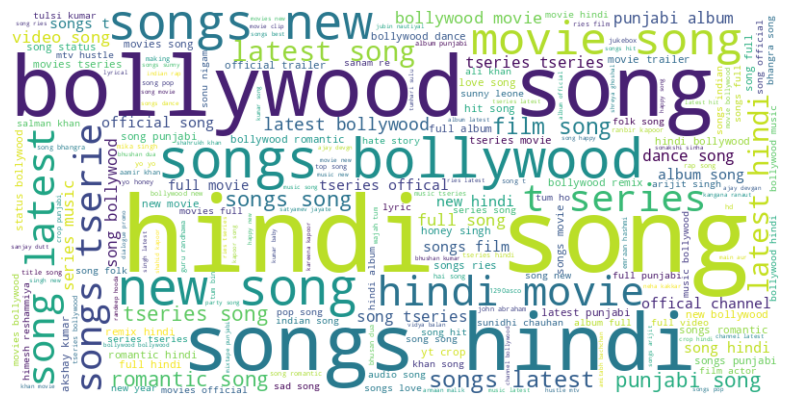

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into one string
all_descriptions = ' '.join(df['tags'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sentiment Scores distribution

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 960.0 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/626.3 kB 960.0 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 944.1 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/626.3 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 245.8/626.3 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/626.3 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/626.3 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 491.5/626.3 kB 1.3 MB/s eta 0:00:01
   -------

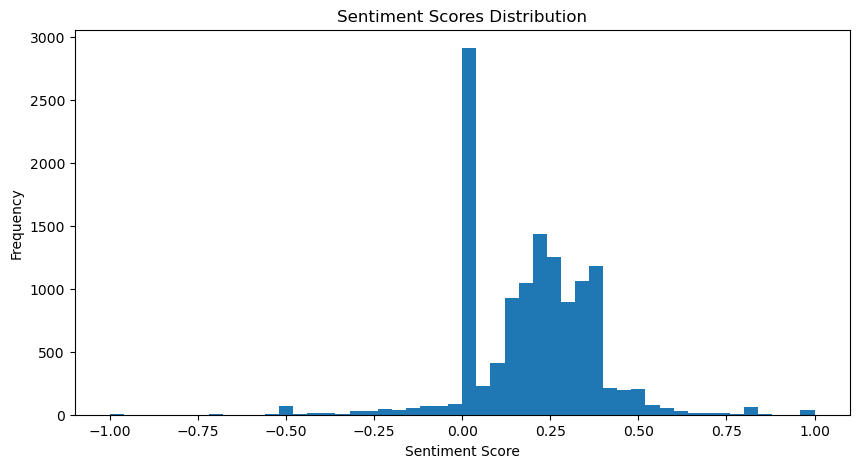

In [63]:
!pip install textblob

from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the cleaned description
df['sentiment'] = df['description_cleaned'].apply(get_sentiment)

# Plot sentiment scores
plt.figure(figsize=(10, 5))
df['sentiment'].plot(kind='hist', bins=50, title='Sentiment Scores Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()